# **Business Case:Jamboree Education - Linear Regression**





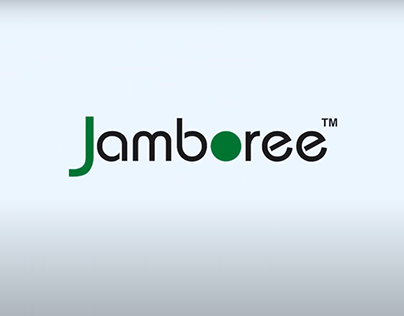

About Jamboree

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort. They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

Understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

--2023-12-04 16:29:36--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 65.8.234.72, 65.8.234.36, 65.8.234.131, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|65.8.234.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv.1’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2023-12-04 16:29:36 (229 MB/s) - ‘Jamboree_Admission.csv.1’ saved [16176/16176]



In [7]:
df=pd.read_csv("Jamboree_Admission.csv")
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


## **1. Exploratory Data Analysis**

In [8]:
df=df.drop('Serial No.',axis=1)

In [9]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
df.shape

(500, 8)

In [12]:
df.isnull().sum() # No missing values good to go

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [13]:
df.info() # all datatypes are correctly identified good to go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [14]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [108]:
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [99]:
# Duplicate values in the dataset
df.duplicated().sum()

0

In [100]:
# unique values in the dataset
for col in df:
    print(f'Number of unique values in the {col} column:',df[col].nunique())

Number of unique values in the Serial No. column: 500
Number of unique values in the GRE Score column: 49
Number of unique values in the TOEFL Score column: 29
Number of unique values in the University Rating column: 5
Number of unique values in the SOP column: 9
Number of unique values in the LOR  column: 9
Number of unique values in the CGPA column: 184
Number of unique values in the Research column: 2
Number of unique values in the Chance of Admit  column: 61
Number of unique values in the ratio_CGPA_GRE column: 468
Number of unique values in the ratio_CGPA_TOEFL column: 435
Number of unique values in the Chance of Admit column: 61


In [101]:
for i in df.columns:
    print(i, '--> ','\n', df[i].unique(), '\n')

Serial No. -->  
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 

### **Univariate Analysis**

In [15]:
df["University Rating"].unique()

array([4, 3, 2, 5, 1])

In [16]:
df["University Rating"].value_counts() # maximum applicant are from university rating 3

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

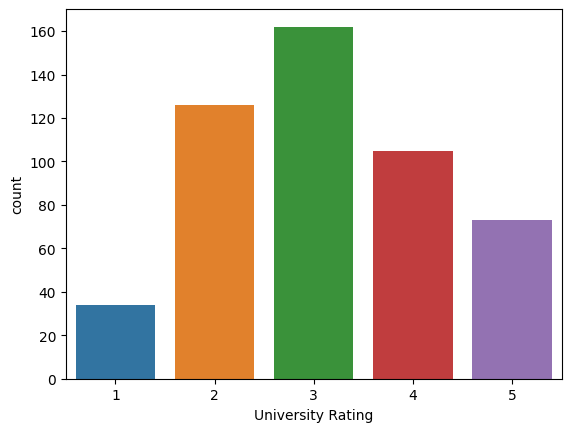

In [17]:
sns.countplot(data=df,x="University Rating") # Visual representation of the above code
plt.show()

In [18]:
df["GRE Score"].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293])

In [19]:
df["GRE Score"].value_counts(bins=5) # maximum applicant score in GRE Score is lie between 300 to 330 out of 350

(310.0, 320.0]      154
(320.0, 330.0]      141
(300.0, 310.0]       96
(330.0, 340.0]       56
(289.949, 300.0]     53
Name: GRE Score, dtype: int64

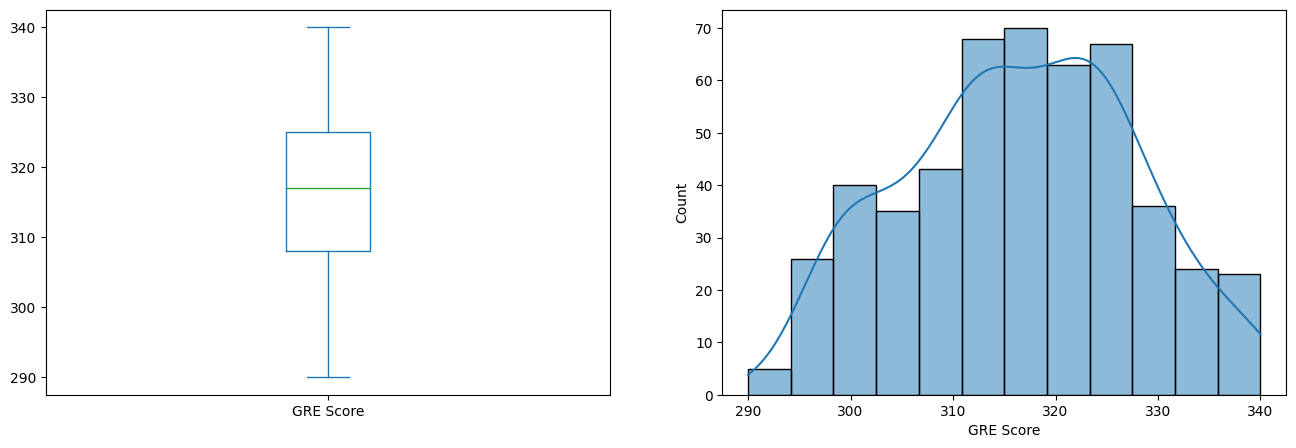

In [20]:
plt.subplot(121)
df["GRE Score"].plot.box(figsize=(16,5))    # Median is at 317
plt.subplot(122)                            # GRE Score data is  normaly distributed
sns.histplot(df["GRE Score"], kde=True)     # no outliers present
plt.show()

In [21]:
df["TOEFL Score"].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92])

In [22]:
df["TOEFL Score"].value_counts(bins=5) # maximum applicant score in TOEFL Score is lie between 95 to 120 out of 120

(108.8, 114.4]               148
(103.2, 108.8]               141
(97.6, 103.2]                126
(114.4, 120.0]                64
(91.97099999999999, 97.6]     21
Name: TOEFL Score, dtype: int64

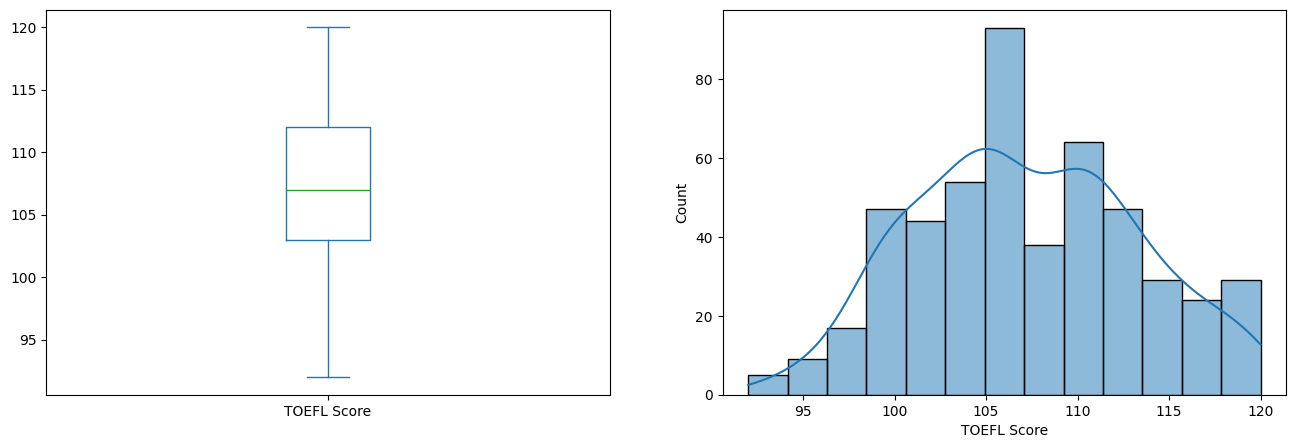

In [23]:
plt.subplot(121)
df["TOEFL Score"].plot.box(figsize=(16,5))    # Median is at 107
plt.subplot(122)                            # TOEFL Score data is  normaly distributed
sns.histplot(df["TOEFL Score"], kde=True)     # no outliers present
plt.show()

In [24]:
df["SOP"].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [25]:
df["SOP"].value_counts(bins=2) # Maximum applicants Statement of Purpose and Letter of Recommendation Strength lie between 3 to 5 out of 5

(3.0, 5.0]      282
(0.995, 3.0]    218
Name: SOP, dtype: int64

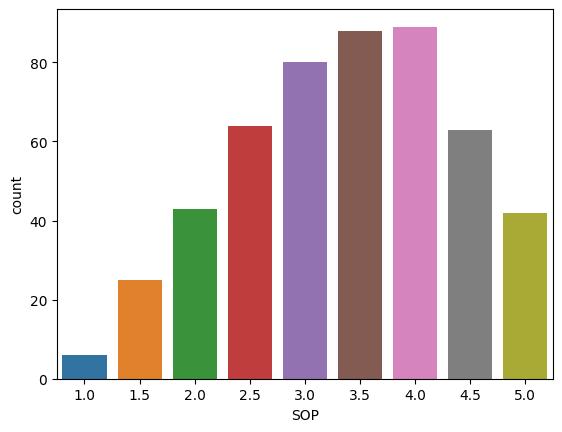

In [26]:
sns.countplot(data=df,x="SOP") # Visual representation of the above code
plt.show()

In [27]:
df["CGPA"].nunique()

184

In [28]:
df["CGPA"].value_counts(bins=5) # Maximum applicants Undergraduate GPA score lie between 7 to 9 out of 10

(8.048, 8.672]                175
(8.672, 9.296]                156
(7.424, 8.048]                 96
(9.296, 9.92]                  61
(6.795999999999999, 7.424]     12
Name: CGPA, dtype: int64

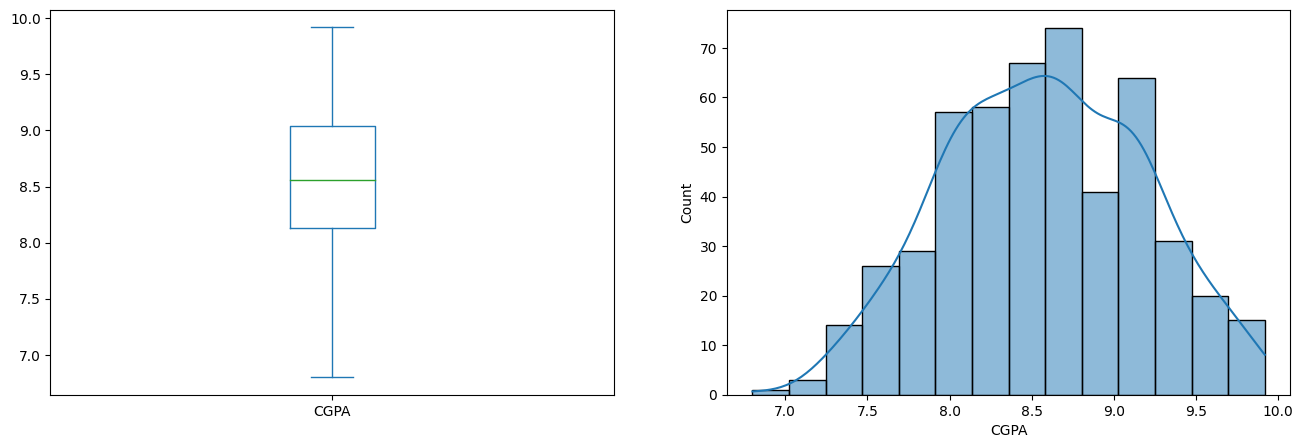

In [29]:
plt.subplot(121)
df["CGPA"].plot.box(figsize=(16,5))    # Median is at 8.56
plt.subplot(122)                       # CGPA Score data is normaly distributed
sns.histplot(df["CGPA"], kde=True)     # no outliers present
plt.show()

In [30]:
df["Research"].unique()

array([1, 0])

In [31]:
df["Research"].value_counts() # Maximum applicants has Research Experience score 1

1    280
0    220
Name: Research, dtype: int64

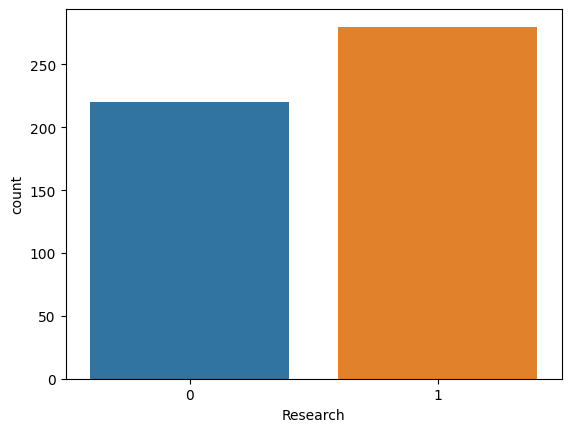

In [32]:
sns.countplot(data=df,x="Research") # Visual representation of the above code
plt.show()                          # Research experience applicants has high chanse to admit

In [33]:
df["Chance of Admit "].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

In [34]:
df["Chance of Admit "].value_counts(bins=5) # Maximum applicants chances of admit range liebetween 0.5 to 0.9

(0.718, 0.844]    155
(0.592, 0.718]    141
(0.844, 0.97]     109
(0.466, 0.592]     71
(0.338, 0.466]     24
Name: Chance of Admit , dtype: int64

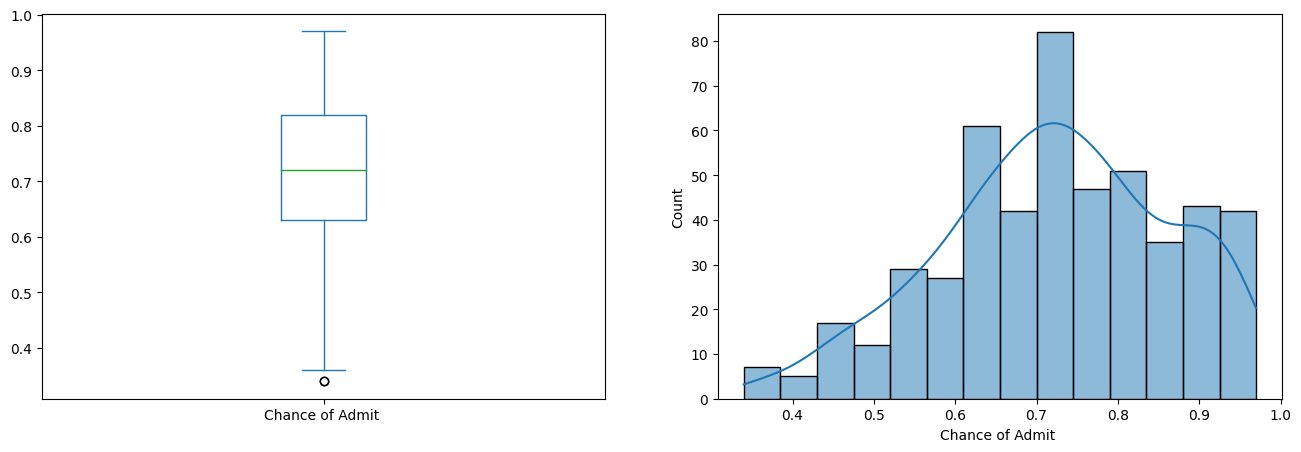

In [35]:
plt.subplot(121)
df["Chance of Admit "].plot.box(figsize=(16,5))    # Median is at 0.72
plt.subplot(122)                                   # Chance of admit data is left skewed
sns.histplot(df["Chance of Admit "], kde=True)     # There are some outliers present
plt.show()

## **Bivariate Analysis**

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

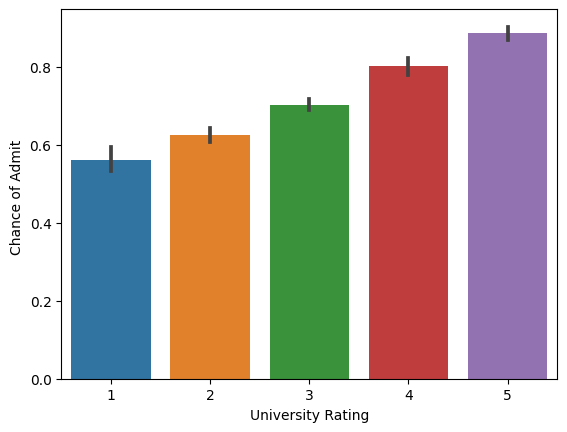

In [36]:
sns.barplot(x="University Rating",y="Chance of Admit ",data=df,estimator=np.mean) # University rating 3,4 and 5 has maximum chance of admit.

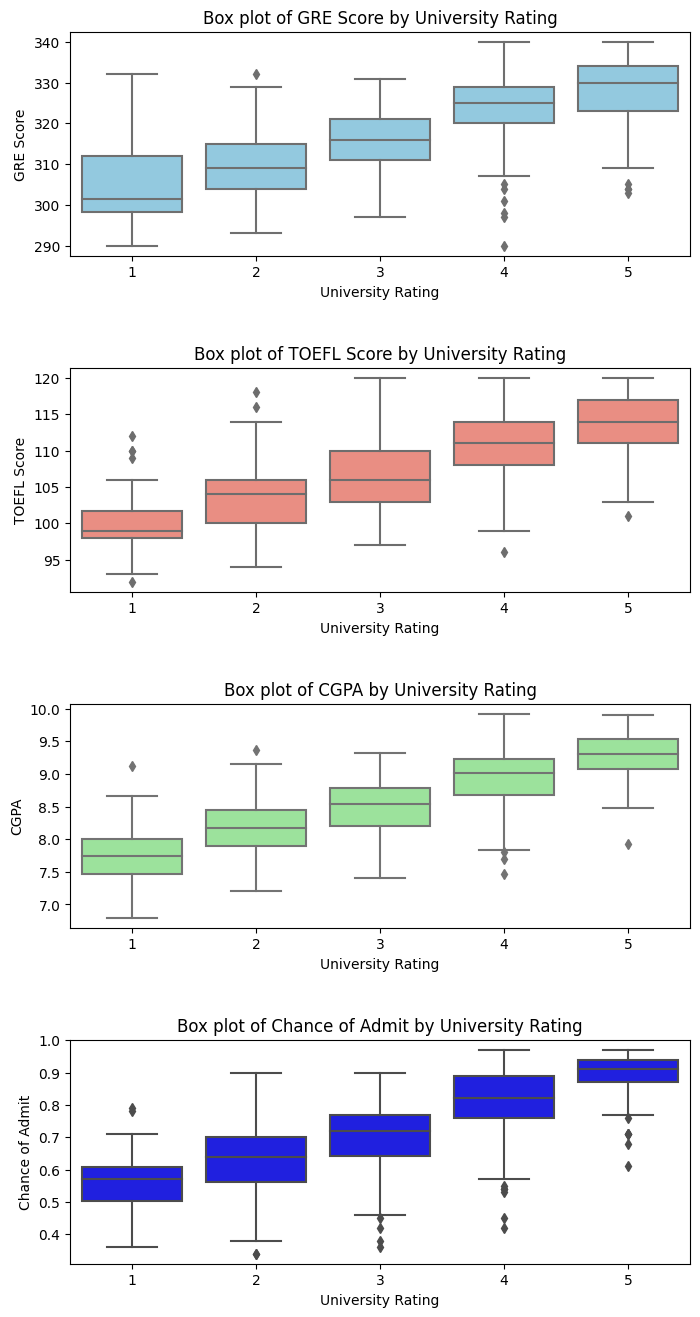

In [102]:
# Columns to analyze
columns_to_analyze = ['GRE Score', 'TOEFL Score','CGPA','Chance of Admit']
x_column = 'University Rating'

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_analyze), ncols=1, figsize=(8, 4 * len(columns_to_analyze)))
fig.subplots_adjust(hspace=0.5)

# Define colors for each variable
colors = ['skyblue', 'salmon', 'lightgreen', 'blue']

for i, y_column in enumerate(columns_to_analyze):
    # Grouped box plot
    sns.boxplot(x=x_column, y=y_column, data=df, ax=axes[i], palette=[colors[i]])
    axes[i].set_title(f'Box plot of {y_column} by {x_column}')

plt.show()

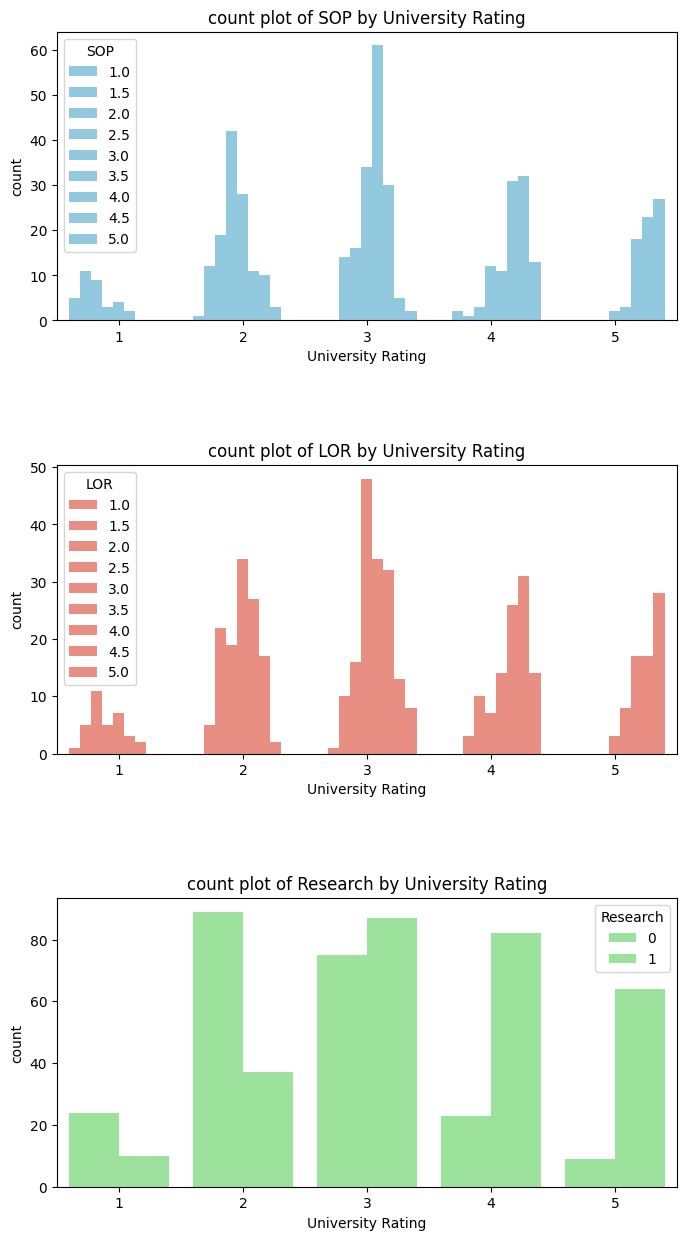

In [109]:
# Columns to analyze
columns_to_analyze = ['SOP', 'LOR','Research']
x_column = 'University Rating'

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_analyze), ncols=1, figsize=(8, 5 * len(columns_to_analyze)))
fig.subplots_adjust(hspace=0.5)

# Define colors for each variable
colors = ['skyblue', 'salmon', 'lightgreen',]

for i, y_column in enumerate(columns_to_analyze):
    # Grouped box plot
    sns.countplot(x=x_column, hue=y_column, data=df, ax=axes[i], palette=[colors[i]])
    axes[i].set_title(f'count plot of {y_column} by {x_column}')

plt.show()

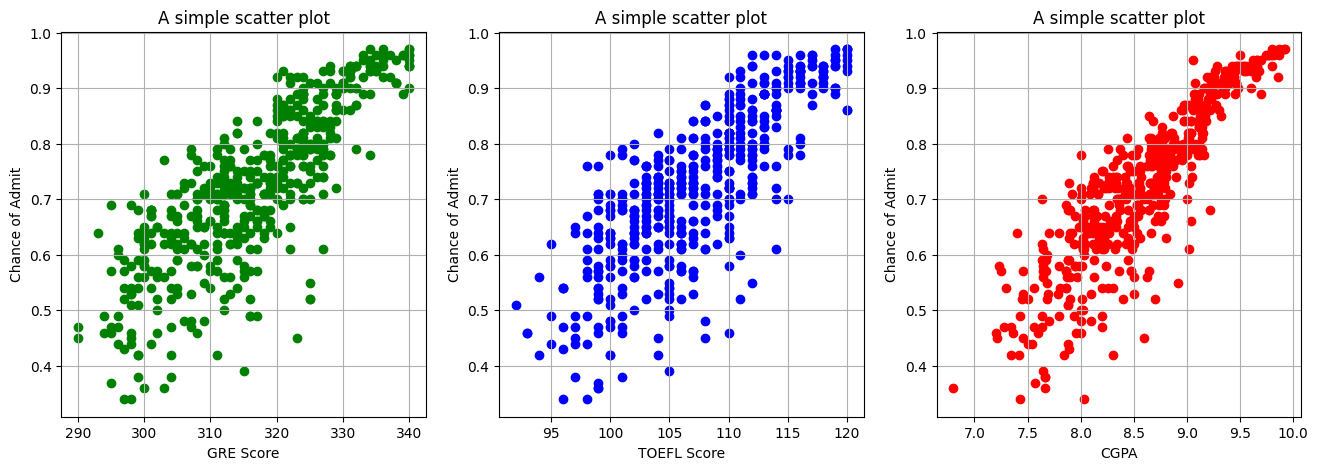

In [37]:
plt.rcParams["figure.figsize"] = (16,5)

plt.subplot(1,3,1)
plt.scatter(x="GRE Score",y="Chance of Admit ",data=df,c='g')
plt.title('A simple scatter plot')  # GRE score and chance of admit is directly proportional with each other.
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.grid()

plt.subplot(1,3,2)
plt.scatter(x="TOEFL Score",y="Chance of Admit ",data=df,c='b')
plt.title('A simple scatter plot') # TOEFL Score and chance of admit is directly proportional with each other.
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admit')
plt.grid()

plt.subplot(1,3,3)
plt.scatter(x="CGPA",y="Chance of Admit ",data=df,c='r')
plt.title('A simple scatter plot')  # CGPA and chance of admit is directly proportional with each other.
plt.xlabel('CGPA')
plt.ylabel('Chance of Admit')
plt.grid()

## **Mulativariate Analysis**

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

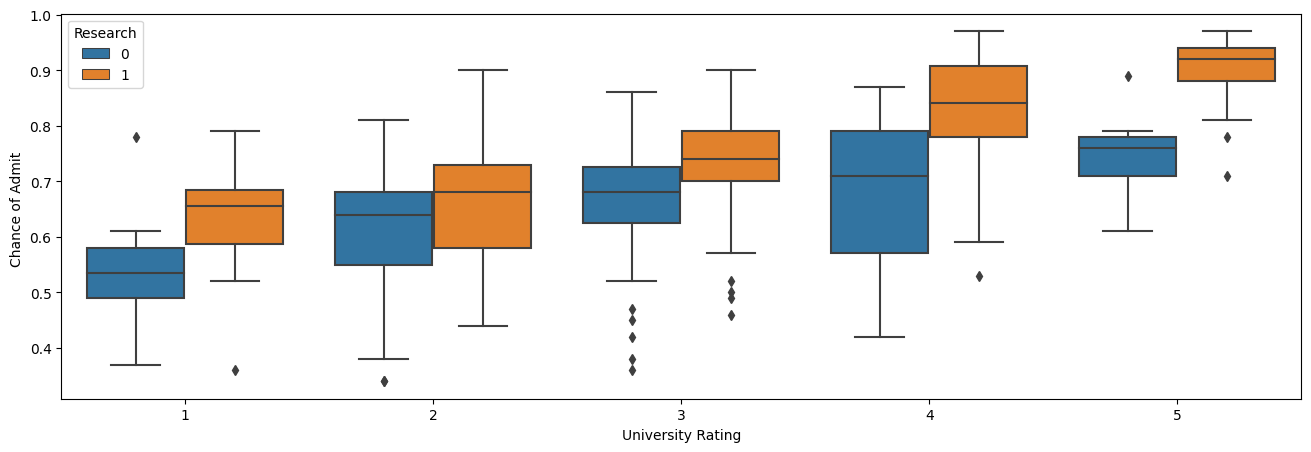

In [38]:
sns.boxplot(x="University Rating",hue="Research",data=df,y="Chance of Admit ",dodge=True)
# applicant from university rating 4 with no research experience has more chances of admision

<Axes: xlabel='University Rating', ylabel='GRE Score'>

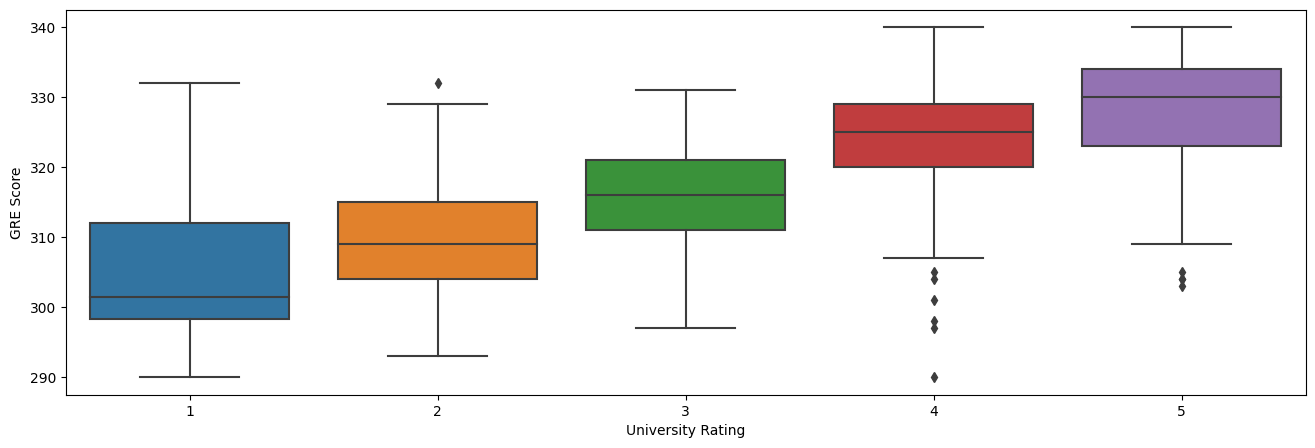

In [39]:
sns.boxplot(x="University Rating",data=df,y="GRE Score",dodge=True)
#

## **2. Data Preprocessing**

### **Duplicate value check**

In [40]:
bool_series = df.duplicated() # From value count we can see that there are zero duplicate values in the data present.
bool_series.value_counts()

False    500
dtype: int64

### **Missing value treatment**

In [41]:
(df.isnull().sum()/len(df))*100 # No missing value present in the data

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

### **Outlier treatment**

In [42]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [43]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

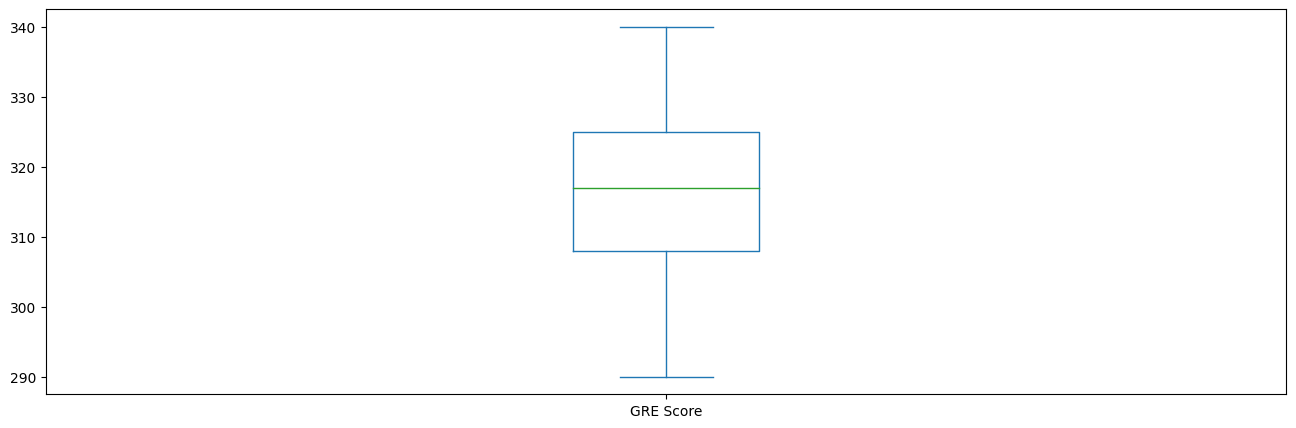

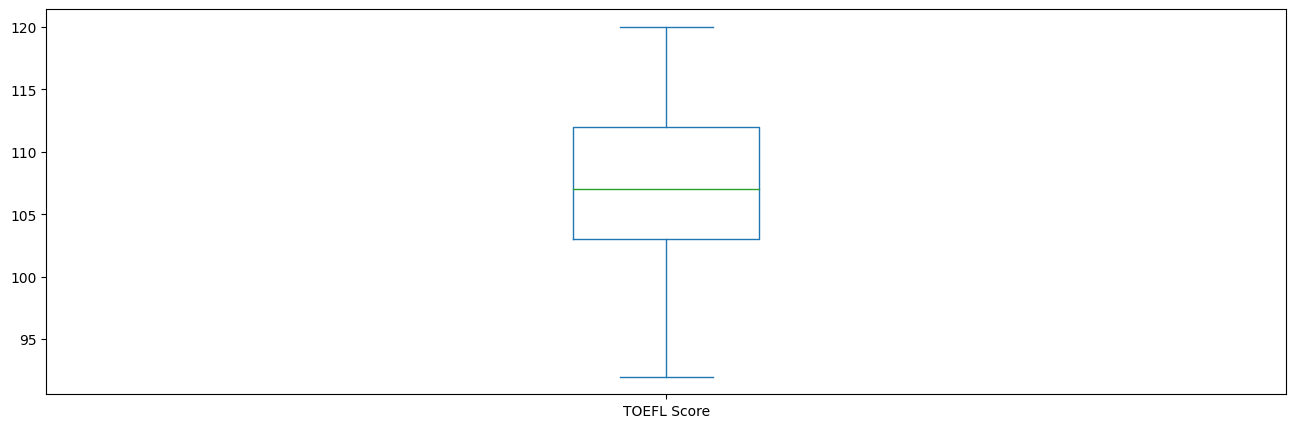

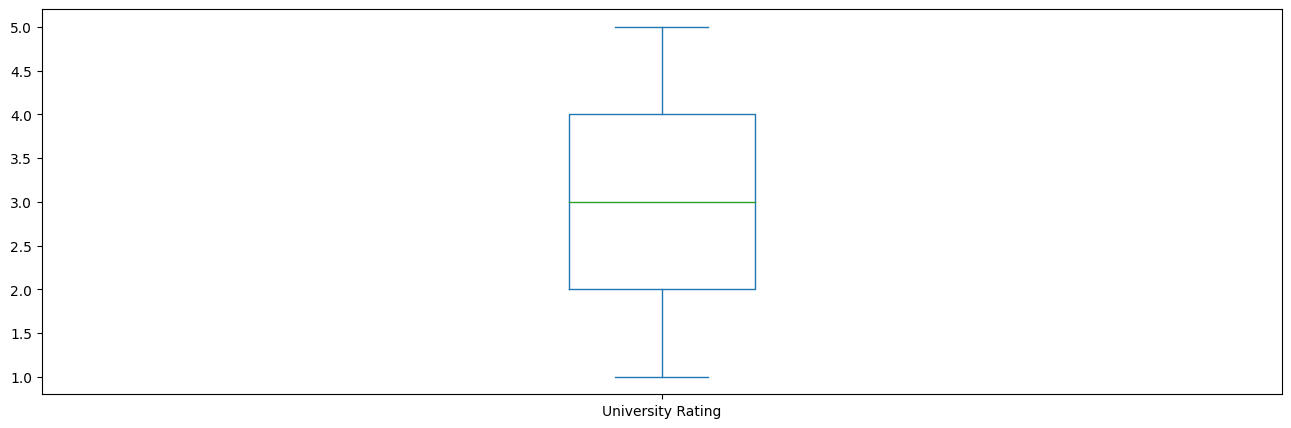

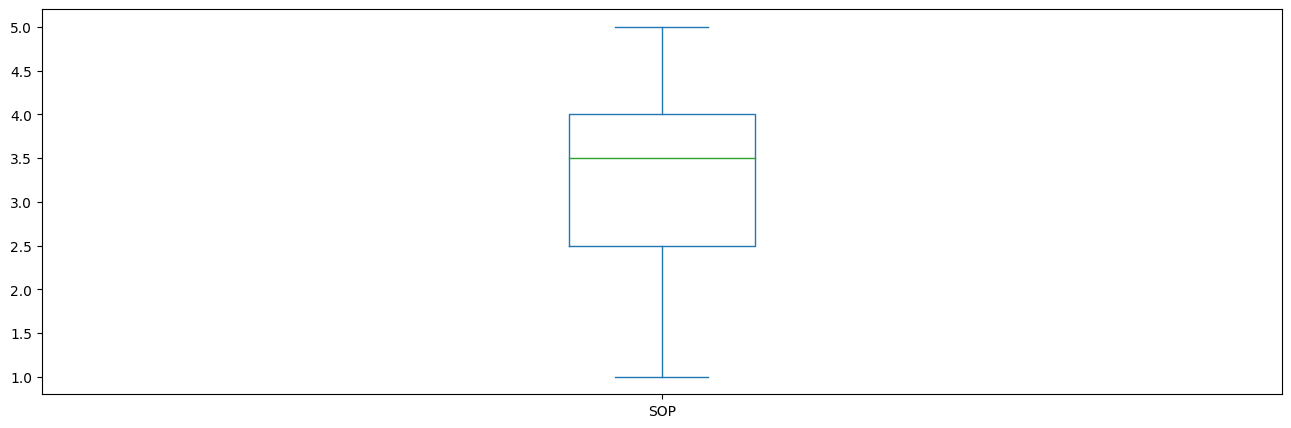

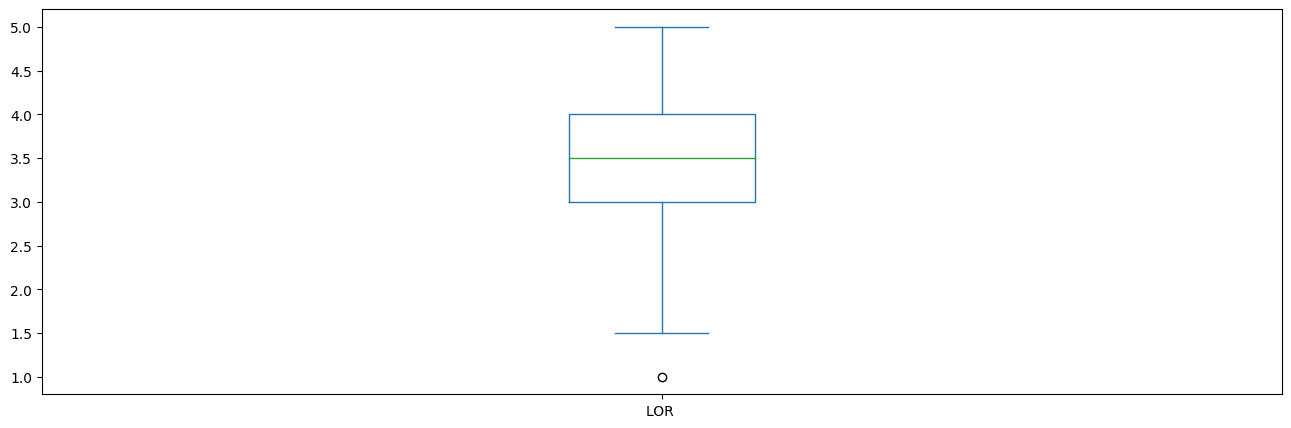

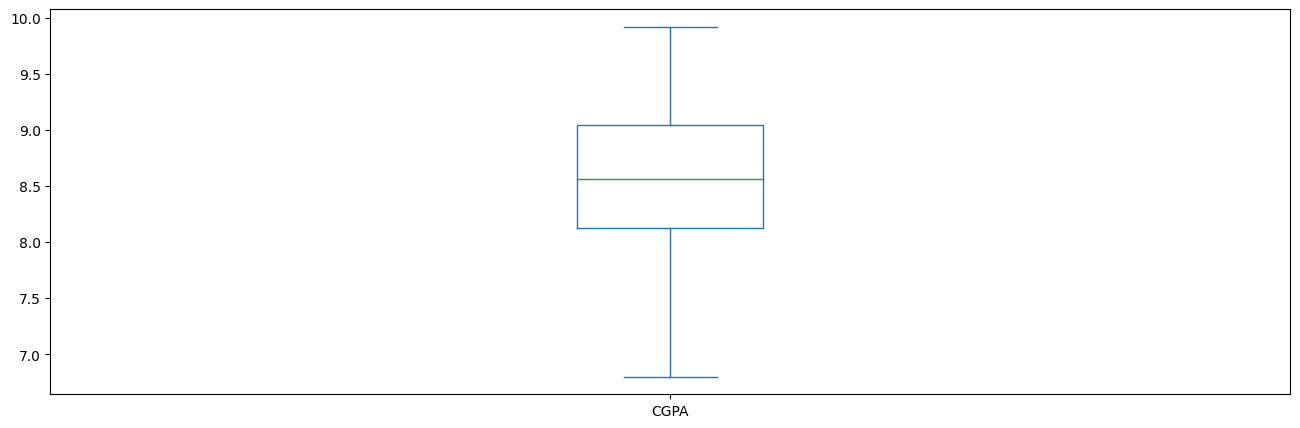

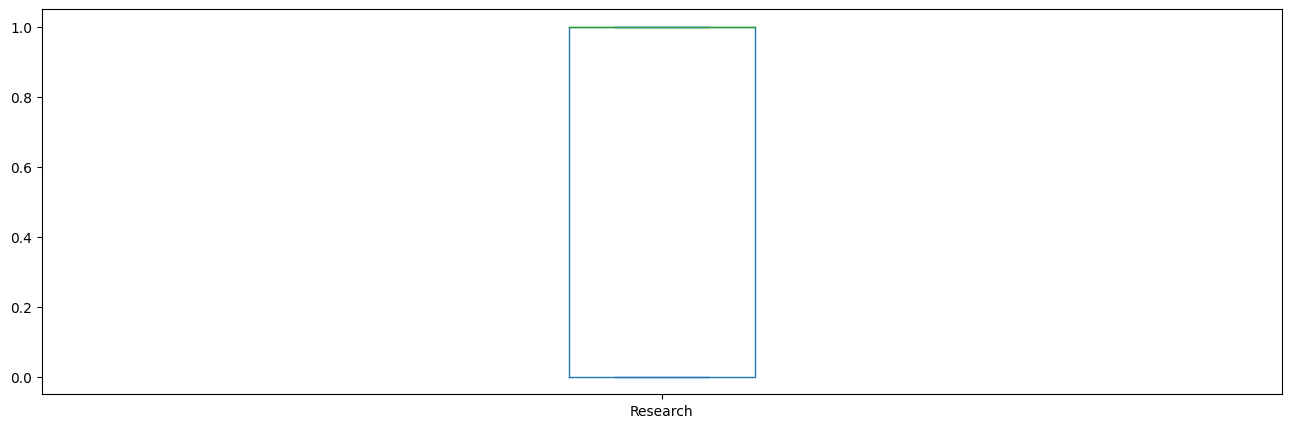

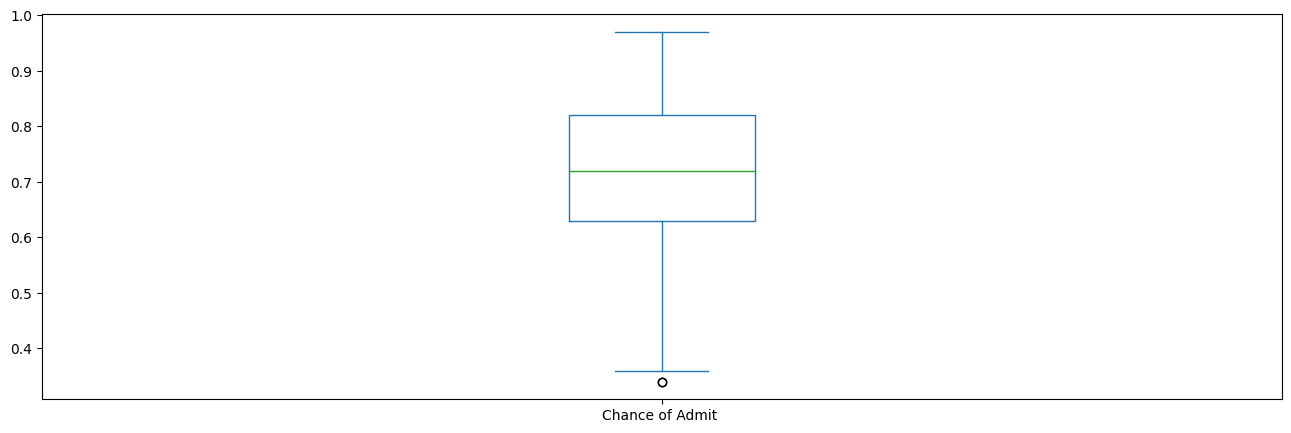

In [44]:
total_columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
for col in total_columns:
  df[col].plot.box(figsize=(16,5))
  plt.show()

In [45]:
Q1=df['Chance of Admit '].quantile(0.25)
Q3=df['Chance of Admit '].quantile(0.75)
IQR=Q3-Q1
print(IQR)
lower_limit=Q1 - 1.5*IQR
Upper_limit=Q3 + 1.5*IQR
print(lower_limit,Upper_limit)

0.18999999999999995
0.3450000000000001 1.105


In [46]:
df=df[(df['Chance of Admit ']>lower_limit) & (df['Chance of Admit ']<Upper_limit)]

In [47]:
df.shape # Outliers are very less in the data so we can neglect the it.

(498, 8)

### **Correlations**

In [48]:
df.shape

(498, 8)

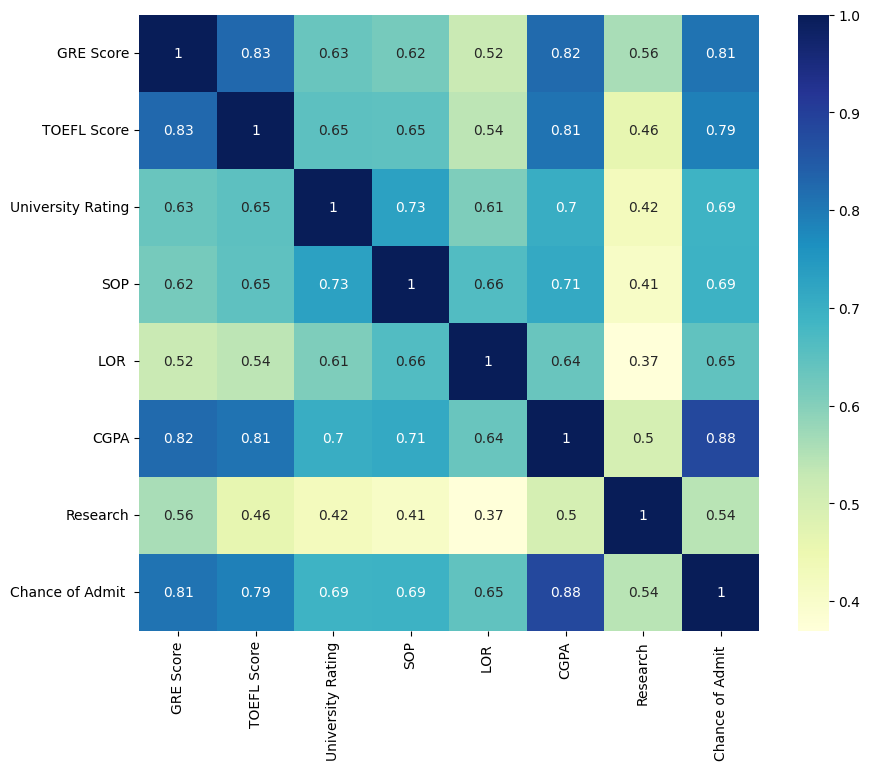

In [49]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Some insights on correlation :

1.   GRE score is highly correlated with chance of admit
2.   TOEFL score is highlty correlated with chanse of admit.
3.   CGPA is also highly correlated with chanse of admit.
4.   University rating, SOP and LOR are almost samely correlated with taget variable which is chanse to admit.
5.   Some independent variables are highly correlated with the independent variables, meaning multicollinearity is present in the data. for example GRE score is highly correlated with TOEFL score with 0.83


            


### **Feature engineering**

In [50]:
df=pd.read_csv("Jamboree_Admission.csv")

In [51]:
# Feature engineering adding extra parameter
ratio_CGPA_GRE=(df["CGPA"]/df["GRE Score"])*100
df["ratio_CGPA_GRE"]=ratio_CGPA_GRE

In [52]:
# let's combine SOP and LOR columns with name SOP_LOR_total
ratio_CGPA_TOEFL=(df["CGPA"]/df["TOEFL Score"])*100
df["ratio_CGPA_TOEFL"]=ratio_CGPA_TOEFL

In [53]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,ratio_CGPA_GRE,ratio_CGPA_TOEFL
0,1,337,118,4,4.5,4.5,9.65,1,0.92,2.863501,8.177966
1,2,324,107,4,4.0,4.5,8.87,1,0.76,2.737654,8.289720
2,3,316,104,3,3.0,3.5,8.00,1,0.72,2.531646,7.692308
3,4,322,110,3,3.5,2.5,8.67,1,0.80,2.692547,7.881818
4,5,314,103,2,2.0,3.0,8.21,0,0.65,2.614650,7.970874


In [54]:
df["Chance of Admit"]=df["Chance of Admit "]

In [55]:
df_new=df.drop(columns=['Chance of Admit ',"Serial No."],axis=1)
df_new.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ratio_CGPA_GRE,ratio_CGPA_TOEFL,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,2.863501,8.177966,0.92
1,324,107,4,4.0,4.5,8.87,1,2.737654,8.289720,0.76
2,316,104,3,3.0,3.5,8.00,1,2.531646,7.692308,0.72
3,322,110,3,3.5,2.5,8.67,1,2.692547,7.881818,0.80
4,314,103,2,2.0,3.0,8.21,0,2.614650,7.970874,0.65


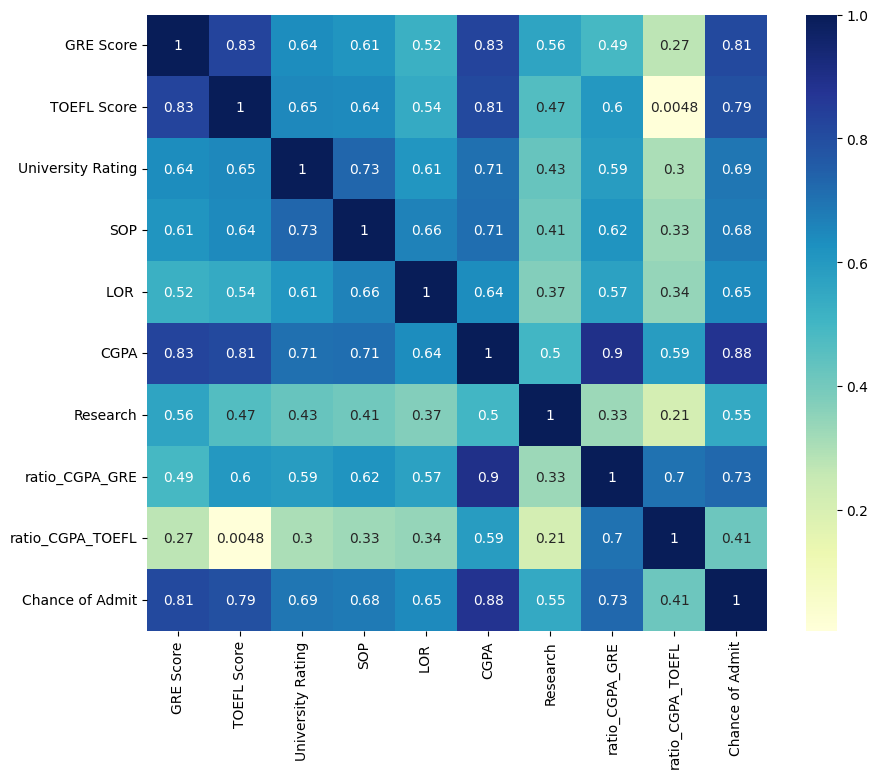

In [56]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df_new.corr(), cmap="YlGnBu", annot=True)

GRE Score, TOEFL Score and CGPA are hightest correlated with `chance of admit` in same order.
- New encoded features are strong predictor.


*   Still multicollinearity present in the data.



## **Data preparation for modeling**

## **Standardization**

In [57]:
## scaling
## Lets scale the data, standardization
from sklearn.preprocessing import StandardScaler

In [58]:
df_new.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'ratio_CGPA_GRE', 'ratio_CGPA_TOEFL', 'Chance of Admit'],
      dtype='object')

In [59]:
df_num=df_new[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research', 'ratio_CGPA_GRE', 'ratio_CGPA_TOEFL']]

In [60]:
scaler = StandardScaler()
df_sc=scaler.fit_transform(df_num)


In [61]:
df_new_sc=pd.DataFrame(df_sc, columns=df_num.columns, index=df_num.index)
df_new_sc.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ratio_CGPA_GRE,ratio_CGPA_TOEFL
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.257447,0.529523
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.240787,0.863755
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-1.423461,-0.922986
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,-0.123617,-0.356197
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.752910,-0.089850


In [62]:
df_new1=pd.concat([df_new_sc,df_new["Chance of Admit"]],axis=1)

In [63]:
df_new1.head() # dataframe ready for the modeling

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ratio_CGPA_GRE,ratio_CGPA_TOEFL,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.257447,0.529523,0.92
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.240787,0.863755,0.76
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-1.423461,-0.922986,0.72
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,-0.123617,-0.356197,0.80
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.752910,-0.089850,0.65


In [64]:
df_new1.shape

(500, 10)

## **Model building**

### **Simple linear regression**

In [65]:
x = df_new1["CGPA"].values # CGPA is 0.88 correlated with taget variable i.e. chanse of admit.
y = df_new1["Chance of Admit"].values

In [66]:
def hypothesis(x,weights):
  y_hat=weights[0]+ weights[1]*x
  return y_hat

In [67]:
hypothesis(2.3,[5,0.8]) ## randomly predicted value

6.84

In [68]:
def error(x,y,weights):
  n= len(x)
  err=0
  for i in range(n):
    y_hat_i=hypothesis(x[i],weights)
    err=err+(y[i] - y_hat_i)**2
  return err/n

In [69]:
def gradient(x,y,weights):
    n=len(x)
    grade= np.zeros((2, ))
    for i in range(n):
        y_hat_i=hypothesis(x[i],weights)
        grade[0] += (y_hat_i - y[i])
        grade[1] += (y_hat_i - y[i])*x[i]
    return (2*grade)/n

In [70]:
def gradient_descent(x,y,ran_itr=200,learning_rate=0.1):
    '''step1: initialise the variable '''
    weights=np.random.rand(2)
    ''' step2: rpeate for 100 times'''
    error_list=[]
    for i in range(ran_itr):
        e=error(x,y,weights)
        error_list.append(e)
        grade = gradient(x,y,weights)
        weights[0]=weights[0]-learning_rate*grade[0]
        weights[1]=weights[1]-learning_rate*grade[1]

    return weights.round(3),error_list


In [71]:
opt_weights, error_list=gradient_descent(x,y)

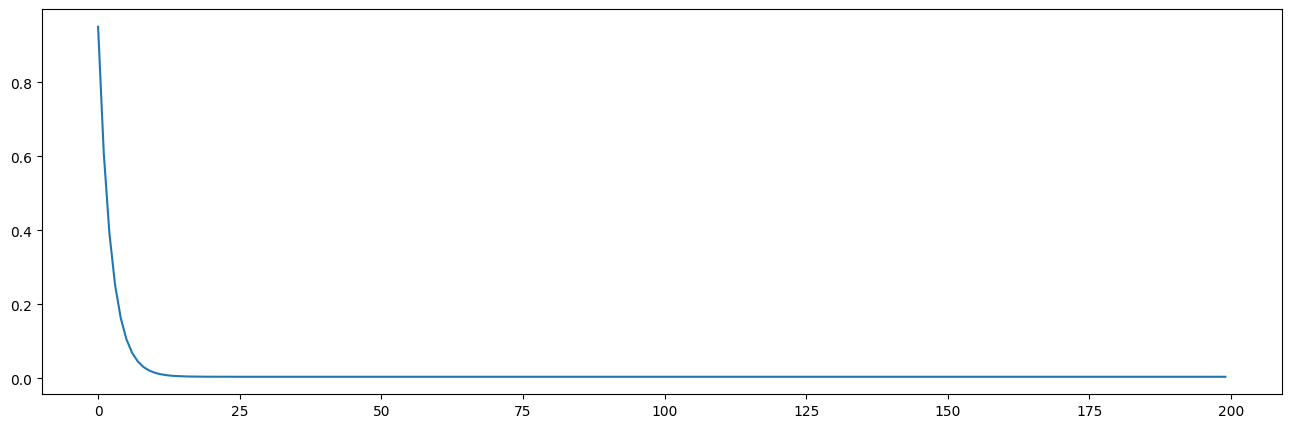

In [72]:
plt.plot(error_list)

In [73]:
Y_hat=hypothesis(x,opt_weights)

In [74]:
def r2_score(Y, Y_hat):
    num = np.sum((Y - Y_hat)**2)
    denom = np.sum((Y - Y.mean())**2)

    r2 = 1 - num/denom

    return r2.round(3)

In [75]:
r2_score(y,Y_hat) # performance of the simple linear regression model using CGPA veriable is 78%
                  # Only CGPA is not important to check the chanse od admit hence let's check multivarient linear regression

0.779

# **Building the Linear Regression model and commenting on the model statistics** **and model coefficients with column names**

In [76]:
df_new1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ratio_CGPA_GRE,ratio_CGPA_TOEFL,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.257447,0.529523,0.92
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.240787,0.863755,0.76
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-1.423461,-0.922986,0.72
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,-0.123617,-0.356197,0.80
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.752910,-0.089850,0.65


In [77]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm


X = df_new1[df_new1.columns.drop('Chance of Admit')]
Y = df_new1["Chance of Admit"]


X_sm = sm.add_constant(X)  #Statmodels default is without intercept, to add intercept we need to add constant

sm_model = sm.OLS(Y, X_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     252.5
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.02e-177
Time:                        16:29:48   Log-Likelihood:                 702.37
No. Observations:                 500   AIC:                            -1385.
Df Residuals:                     490   BIC:                            -1343.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7217      0.00

# **Linear Regression model**

In [78]:
X = df_new1[df_new1.columns.drop('Chance of Admit')]
Y = df_new1["Chance of Admit"]

#Train and test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# train the model
lr.fit(X_train, y_train)
Pred = lr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
print("Linear Regression R2_score :",r2_score(y_test, Pred))

Linear Regression R2_score : 0.8313554590045338


In [79]:
lr.coef_

array([ 0.07362709,  0.03097081,  0.00572688, -0.00115692,  0.01779132,
       -0.05144605,  0.01351941,  0.07205956,  0.00848471])

In [80]:
coeff=pd.DataFrame()                                    # GRE score has highest weight than the other features
X_c=X                                                   # 3rd highest weight is on CGPA score.
coeff["Features"]=X_c.columns
coeff["Coefficients"]=lr.coef_
coeff["Coefficients"] = round(coeff["Coefficients"], 5)
coeff = coeff.sort_values(by = "Coefficients", ascending = False)
coeff


,Features,Coefficients
0,GRE Score,0.07363
7,ratio_CGPA_GRE,0.07206
1,TOEFL Score,0.03097
4,LOR,0.01779
6,Research,0.01352
8,ratio_CGPA_TOEFL,0.00848
2,University Rating,0.00573
3,SOP,-0.00116
5,CGPA,-0.05145


<Axes: xlabel='Features', ylabel='Coefficients'>

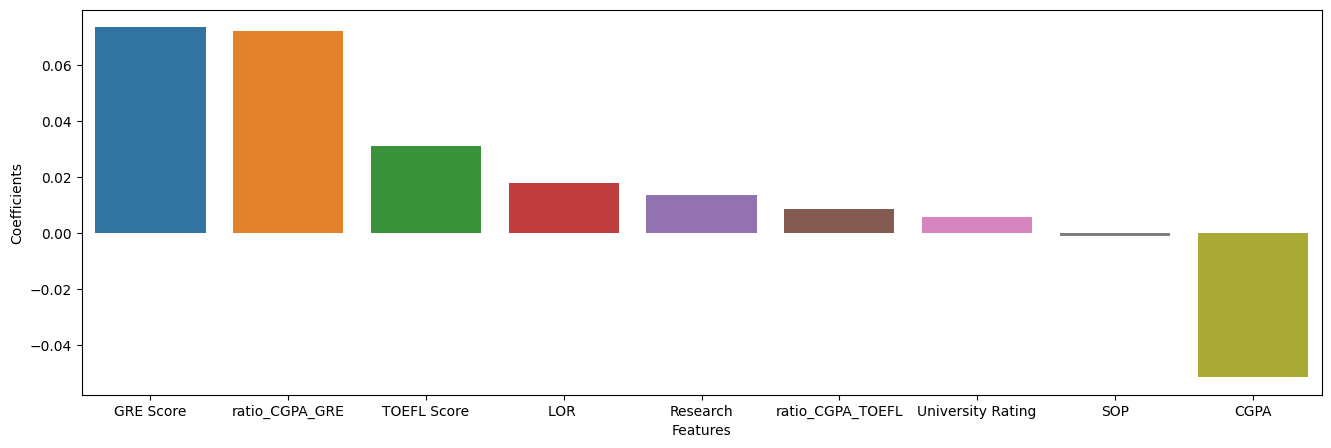

In [81]:
sns.barplot(x="Features",y="Coefficients",data=coeff) # visual represntation of the cofficients of all features present in the data.

The bar graph shows the coefficients of all features present in the data. The features are listed on the x-axis, and their corresponding coefficients are on the y-axis. The coefficient values range from -0.04 to 0.06.

The features with the highest coefficients are GRE Score, TOEFL Score, and CGPA. This means that these features are the most predictive of the target variable. The features with the lowest coefficients are University Rating and SOP. This means that these features are the least predictive of the target variable.

The coefficient for Research is positive, which means that a higher research score is associated with a higher target variable. The coefficient for LOR is negative, which means that a higher number of letters of recommendation is associated with a lower target variable.

Overall, the data analysis suggests that GRE Score, TOEFL Score, and CGPA are the most important factors for predicting the target variable. Research is also a positive predictor, while LOR is a negative predictor. University Rating and SOP are the least important factors.

# **Lasso regression using sklearn**

In [82]:
from sklearn.linear_model import Lasso

X = df_new1[df_new1.columns.drop('Chance of Admit')]
Y = df_new1["Chance of Admit"]

#Train and test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)


# initialize Lasso regression and set the value of alpha equal to 1
ls = Lasso(alpha= 1)

# fit the model
ls.fit(X_train,y_train)

#predict
ls_pred=ls.predict(X_test)
#r2_score
lasso_r2_score=r2_score(y_test, ls_pred)

#print intercepts and coefficients rounded off upto 2 decimal digit
print("Coefficients:",list(zip(X.columns, ls.coef_)))
print("Intercepts:",ls.intercept_.round(2))
print("LASSO R2_score:",lasso_r2_score)

Coefficients: [('GRE Score', 0.0), ('TOEFL Score', 0.0), ('University Rating', 0.0), ('SOP', 0.0), ('LOR ', 0.0), ('CGPA', 0.0), ('Research', 0.0), ('ratio_CGPA_GRE', 0.0), ('ratio_CGPA_TOEFL', 0.0)]
Intercepts: 0.72
LASSO R2_score: -0.0424956830527512


**Note:-** Here, in this data set all feature are important there is no as such less important feature hence we can not make all the features equal to zero as it has some multicolinearity but we can not remove it by lasso regression. Hence we can canclude that lasso regression is not suitable for this dataset.

# **Ridge regression using sklearn**

In [83]:
from sklearn.linear_model import Ridge

rd=Ridge()
rd.fit(X_train, y_train)

#predict
rd_pred=ls.predict(X_test)
#r2_score
ridge_r2_score=r2_score(y_test, rd_pred)

#print intercepts and coefficients rounded off upto 2 decimal digit
print("Coefficients:",list(zip(X.columns, rd.coef_)))
print("Intercepts:",rd.intercept_.round(2))
print("Ridge R2_score:",ridge_r2_score.round(5))

Coefficients: [('GRE Score', 0.03614361074336035), ('TOEFL Score', 0.032593241490360254), ('University Rating', 0.005798732819659048), ('SOP', -0.0009687211589251483), ('LOR ', 0.0177264699326378), ('CGPA', 0.020028152564601543), ('Research', 0.013413003702513708), ('ratio_CGPA_GRE', 0.024366648155271887), ('ratio_CGPA_TOEFL', 0.009882680902879417)]
Intercepts: 0.72
Ridge R2_score: -0.0425


**Note:-** Same with the ridge regression there is no need to regularise the model as each feature has it's own importance and without making it zero or moving it toward zero we can build the linear regression model with zero mean_square_error value and r2 score upto 0.8+

# **Testing the assumptions of the linear regression model**

### **1.Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5)**

In [84]:
# VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,2036.53
7,ratio_CGPA_GRE,1413.88
1,TOEFL Score,1095.53
0,GRE Score,867.55
8,ratio_CGPA_TOEFL,580.79
3,SOP,2.84
2,University Rating,2.67
4,LOR,2.04
6,Research,1.50


<Axes: xlabel='Features', ylabel='VIF'>

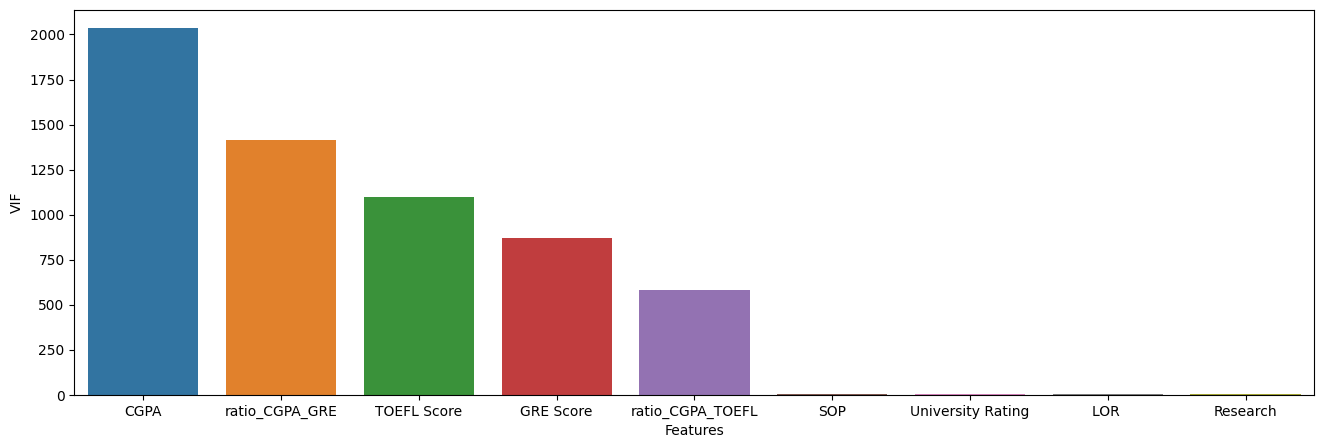

In [86]:
sns.barplot(x="Features",y="VIF",data=vif) # visual rpresntation of VIF for each feature.
                                           # Any variable with a VIF of 10 or above is considered strongly correlated with other variables.
                                           # CGPA, TOEFL score, GRE score these all original feature are highly correlated with other variables.
                                           # SOP, University rating, LOR and Reseach's VIF is less than 5 hence they are not correlated with other variables.
                                           # new encoded feature ratio_CGPA_GRE and ratio_CGPA_TOEFL are highly correlated with other variables.

CGPA has the highest importance score, followed by ratio_CGPA_GRE, TOEFL Score, and GRE Score. This suggests that a student's CGPA is the most important factor in predicting their VIP score, followed by how their CGPA compares to their GRE score, their TOEFL score, and their GRE score itself.

The importance scores of ratio CGPA TOEFL, SOP, University Rating, LOR, and Research are all relatively low. This suggests that these factors are not as important as the others in predicting a student's VIP score.

## **2. The mean of residuals is nearly zero**

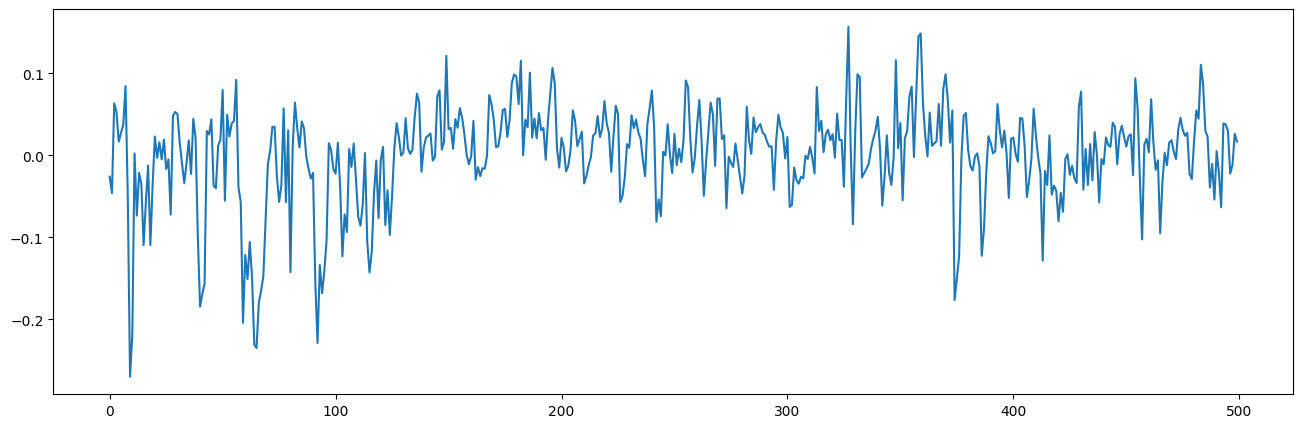

In [87]:
residuals=sm_model.resid
plt.plot(residuals.index,residuals)

## **3. Linearity of variables (no pattern in the residual plot)**

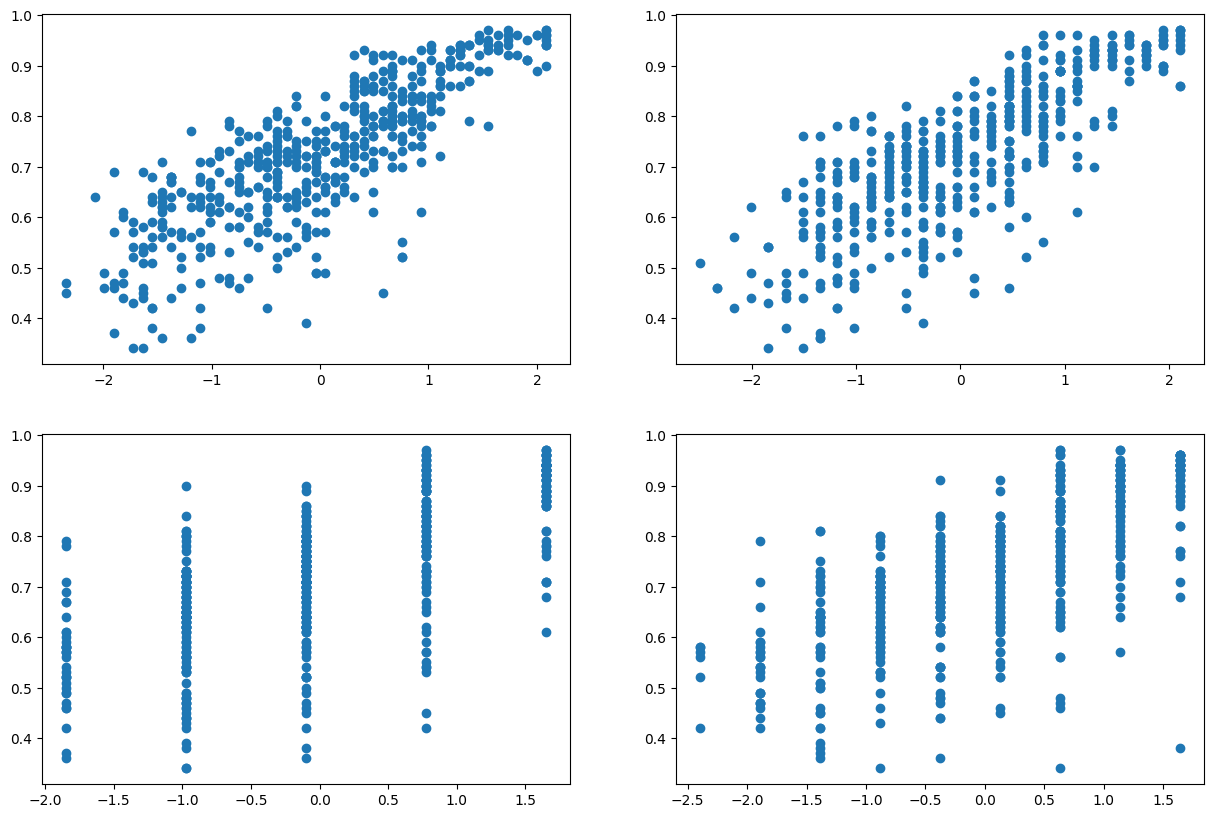

In [88]:
from mpl_toolkits.mplot3d import axes3d                   # In this dataset almost each variable is linearly related with the target variable.
plt.rcParams["figure.figsize"]=(15,10)                    # for example GRE scoire is linearly related with tha chance to admit
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
ax1.scatter(X["GRE Score"],Y)
ax2.scatter(X["TOEFL Score"],Y)
ax3.scatter(X["University Rating"],Y)
ax4.scatter(X["SOP"],Y)
plt.show()

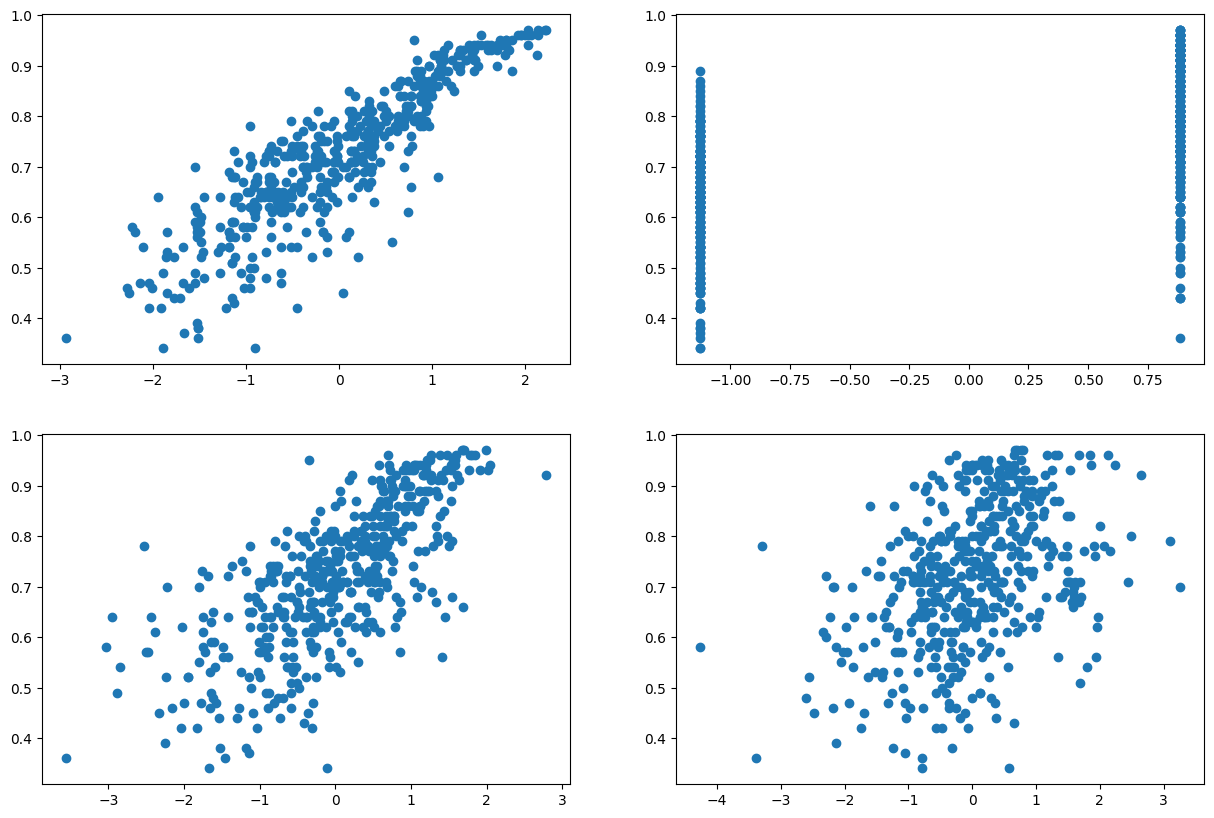

In [89]:
from mpl_toolkits.mplot3d import axes3d             # CGPA is linearly related with tha chance to admit column.
plt.rcParams["figure.figsize"]=(15,10)
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2)
ax1.scatter(X["CGPA"],Y)
ax2.scatter(X["Research"],Y)
ax3.scatter(X["ratio_CGPA_GRE"],Y)
ax4.scatter(X["ratio_CGPA_TOEFL"],Y)
plt.show()

## **4. Test for Homoscedasticity**

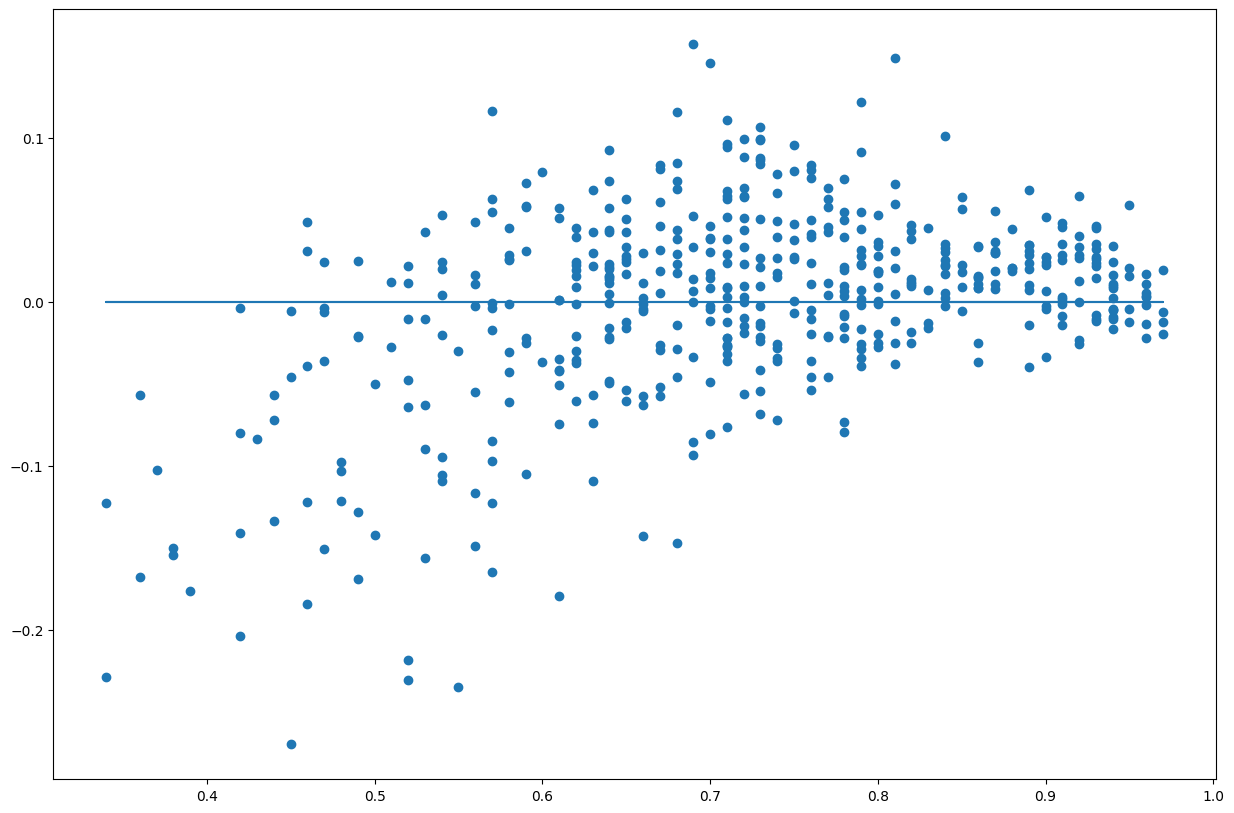

In [90]:
residuals=sm_model.resid   # In prob/stats proof of linear regression, we assume the error are normally distributed with mean of 0 and contant standard deviation.
plt.scatter(Y,residuals)   # Homoscedasticity exists in our data.
plt.plot(Y,[0]*len(Y))     # There is no outliers present in the dataset.

## **5. Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line)**

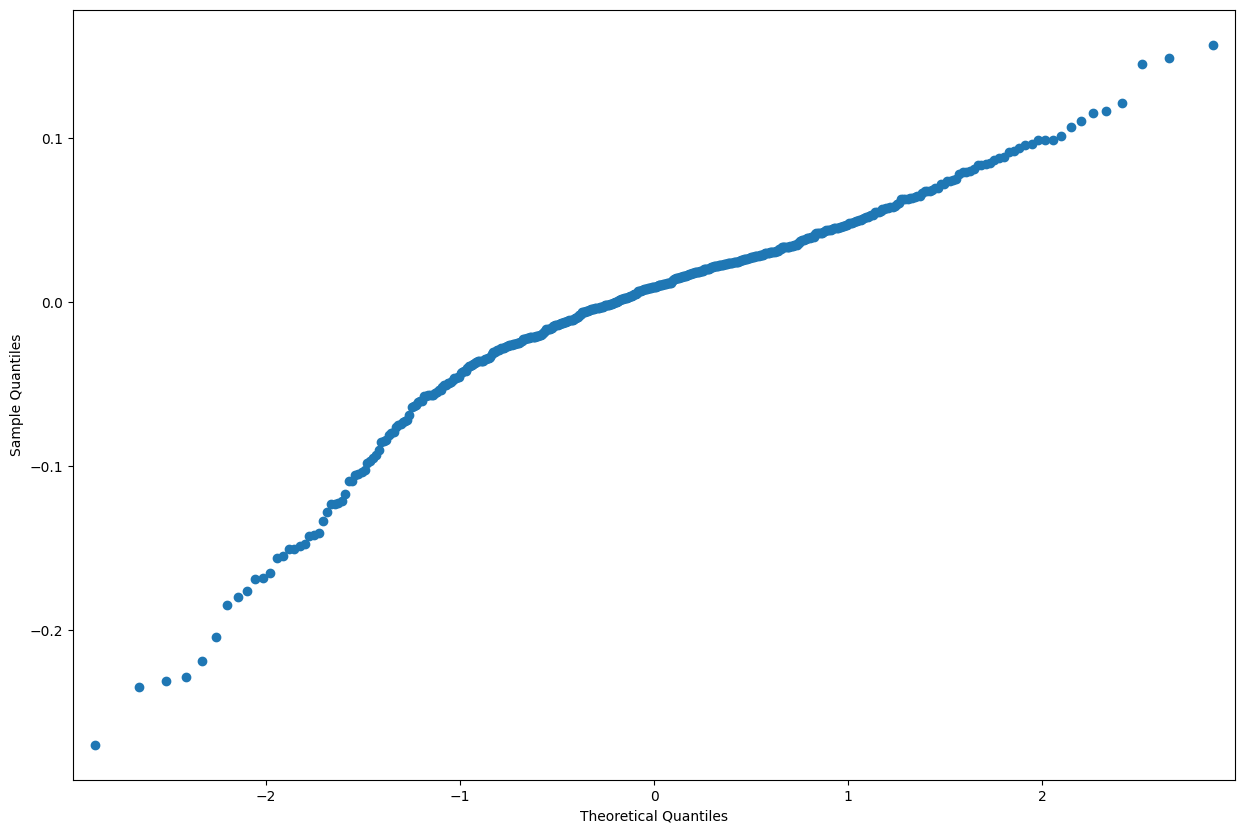

In [91]:
residuals=sm_model.resid     # from qqplot we can say that normality of residuals is linear in nature.
sm.qqplot(residuals)
plt.show()

In [92]:
np.mean(residuals)

1.0746958878371515e-16

<Axes: ylabel='Density'>

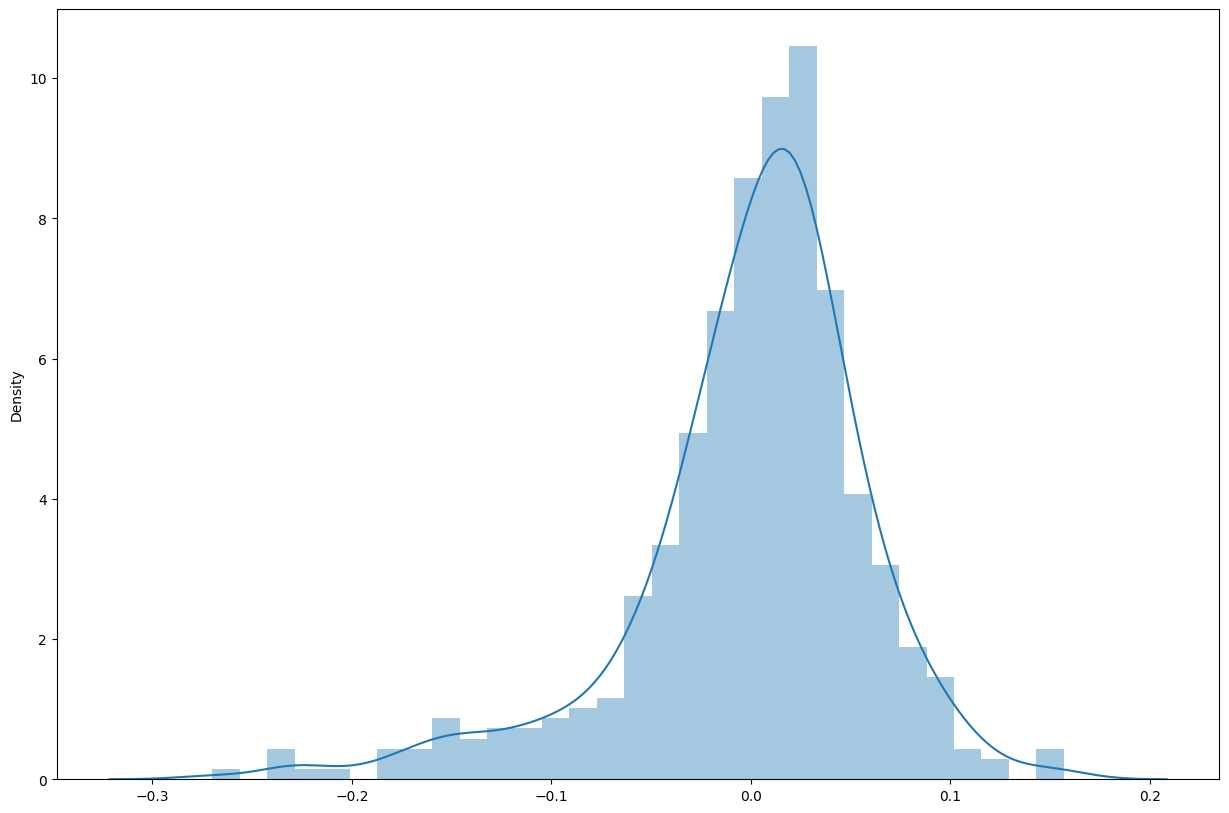

In [93]:
sns.distplot(residuals) # Perfectly normaly distributed cure we found here.
                        # we get almost bell-shaped curve in residuals distribution.
                        # There is very less outliers present in the dataset

## **Model performance evaluation**

## **Metrics checked - MAE, RMSE, R2, Adj R2**

In [94]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [95]:
predict=lr.predict(X_test)

In [96]:
MSE=mean_squared_error(y_test, predict)
print("Mean_absolute_error=",mean_absolute_error(y_test, predict).round(3))
print("Root_mean_squared_error=",np.sqrt(MSE).round(3))
print("R2_score=",r2_score(y_test, predict).round(3))

Mean_absolute_error= 0.044
Root_mean_squared_error= 0.057
R2_score= 0.831


In [97]:
#Adjusted R2 score
Adj_r2_score=1 - (1-lr.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted R2 score=",np.round(Adj_r2_score,3))


Adjusted R2 score= 0.818




## *  Mean_absolute_error(MAE) is 0.044
## *  Root_mean_squared_error(RMSE) is 0.057

## *   R2_score(R2) is 0.831
## *   Adjusted R2 score(Adj R2) is 0.818





## **Train and test performances are checked**

In [98]:
predict_train=lr.predict(X_train)
predict_test=lr.predict(X_test)

print("r2_score of train data=",r2_score(y_train, predict_train).round(3))
print("r2_score of test data=",r2_score(y_test, predict_test).round(3))
print()
print("mean_squared_error of train data=",mean_squared_error(y_train, predict_train).round(3))
print("mean_squared_error of test data=",mean_squared_error(y_test, predict_test).round(3))
print()
print("mean_absolute_error of train data=",mean_absolute_error(y_train, predict_train).round(3))
print("mean_absolute_error of test data=",mean_absolute_error(y_test, predict_test).round(3))

r2_score of train data= 0.818
r2_score of test data= 0.831

mean_squared_error of train data= 0.004
mean_squared_error of test data= 0.003

mean_absolute_error of train data= 0.043
mean_absolute_error of test data= 0.044


**Comments on the performance measures**


*   R2 score of train data and test data is almost same there is only the difference of 0.013
*   A value of 0.8 for R-square score sounds good. It means linear regression model is performing pretty good.

*   Mean square error and mean absolute error is almost zero it means that model is pefectly build.
* linear regression model is performing very well on the unseen data which is test data.






# **Actionable Insights & Recommendations:-**



1.   CGPA and Research are the only two variables which are important in making the prediction for Chance of Admit.

2. CGPA is the most important varibale in making the prediction for the Chance of Admit.

3. Following are the final model results on the test data:
* Mean_absolute_error(MAE) is 0.044
* Root_mean_squared_error(RMSE) is 0.057
* R2_score(R2) is 0.831
* Adjusted R2 score(Adj R2) is 0.818

4.   The linear regression model or a feature where students/learners can come to their website and check if their probability of getting into the IVY league college has built and this model gives 81% true result or we can say the probability of getting admition.**

5.   This model is useful to attract a maximum number of audience or students/learners and jamboree will get the basic information about that audience for the marketing purpose.**

6.   With the help of this model, Jamboree can get the list of student/learner who has less chance to admit and  Jamboree can offer them coaching and help them to get into their dream universities. This point is very useful from a business perspective.**

7.   One recommendation while collecting the data we can create one more column of city or region names so that we can get the target audience from those particular regions and marketing can be done according to that region.**
8. This model could identify students who have lower probabilities of admission. This information could be used by Jamboree to offer coaching and support services to help improve these students' chances of admission. This approach can be beneficial both for the students and for Jamboree's business goals.





